In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
import linregfunc as lr
import pandas as pd
import seaborn as sns

plt.style.use("fivethirtyeight")

# <font face="gotham" color="purple"> Common Distributions in Hypothesis Testing </font>

Here we will have a quick refresh of distributions that are commonly used in hypothesis testing. 

## <font face="gotham" color="purple"> The Normal Distributions </font>

Normal Distribution is the most important one among all, here we provide a graphic reminder of bivariate normal distribution. Please check out my notebooks of linear algebra, there is a whole chapter devoted for normal distribution.

For your reference, the pdf of multivariate normal distribution is

$$
p(\boldsymbol{x} ; \mu, \Sigma)=\frac{1}{(2 \pi)^{n / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}(x-\mu)^{T} \Sigma^{-1}(x-\mu)\right) \tag{1}\label{1}
$$

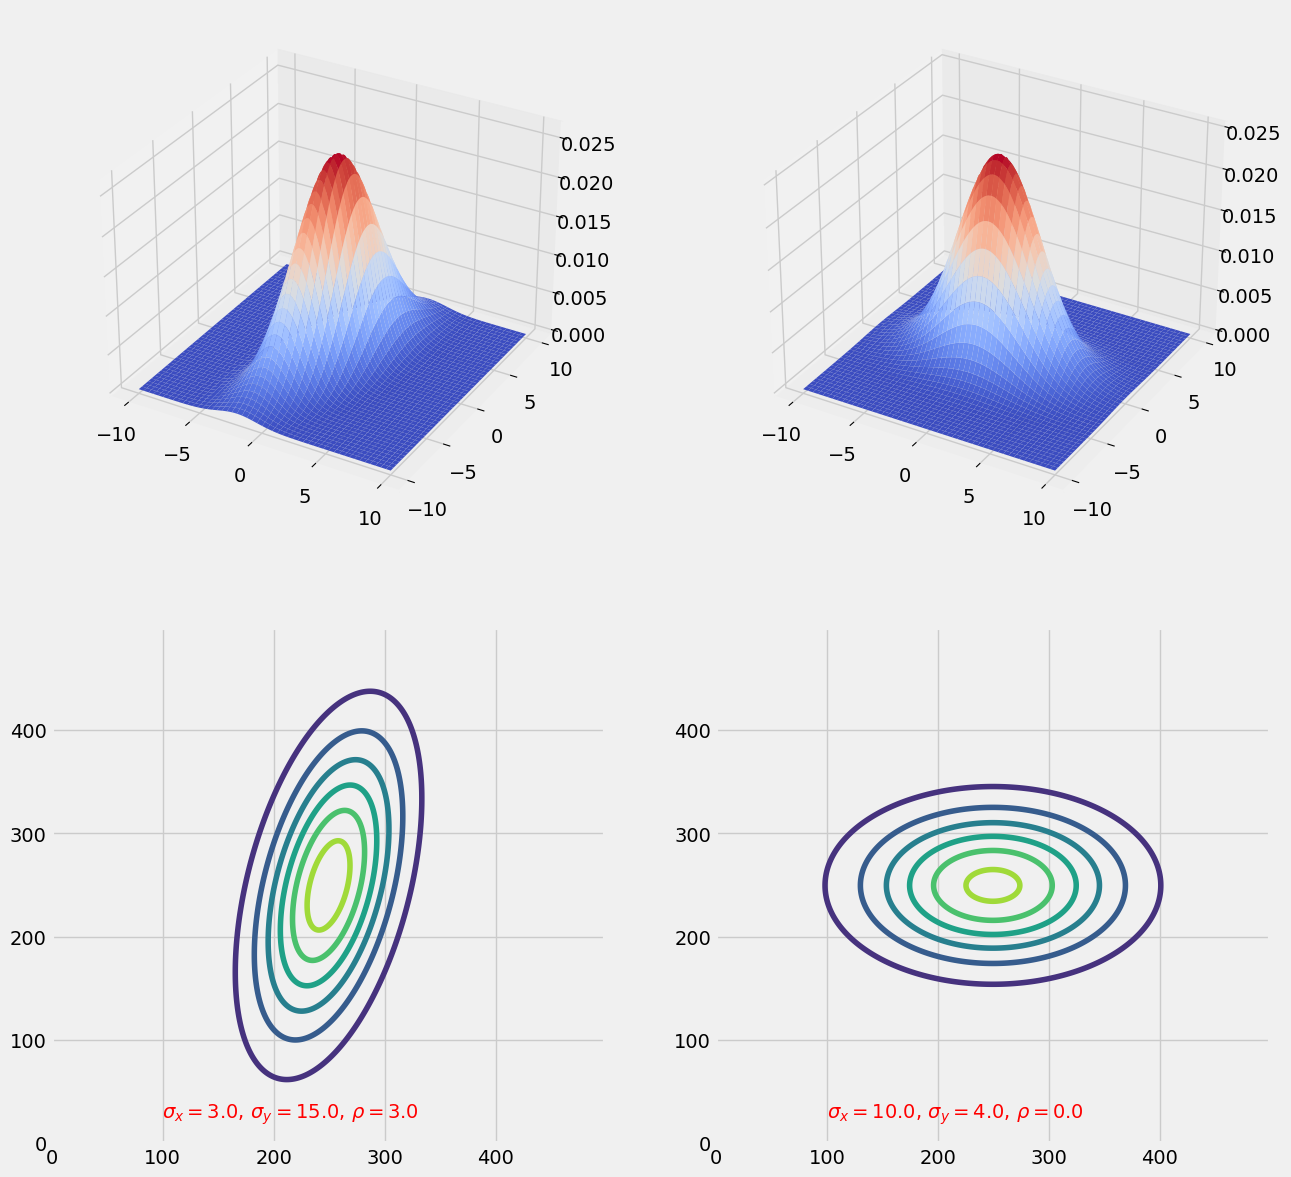

In [21]:
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)

pos = np.array([X.flatten(), Y.flatten()]).T  # two columns matrix

fig = plt.figure(figsize=(14, 14))

#########################
ax = fig.add_subplot(221, projection="3d")

mu_x = 0
mu_y = 0

sigma_x = 3
sigma_y = 15
rho = 3

rv = sp.stats.multivariate_normal(
    [mu_x, mu_y], [[sigma_x, rho], [rho, sigma_y]]
)  # frozen distribution
ax.plot_surface(X, Y, rv.pdf(pos).reshape(500, 500), cmap="coolwarm")

ax = fig.add_subplot(223)
ax.contour(rv.pdf(pos).reshape(500, 500))
string1 = r"$\sigma_x = %.1f$, $\sigma_y = %.1f$, $\rho = %.1f$" % (
    sigma_x,
    sigma_y,
    rho,
)
ax.annotate(text=string1, xy=(0.2, 0.05), xycoords="axes fraction", color="r")

####

mu_x = 0
mu_y = 0

sigma_x = 10
sigma_y = 4
rho = 0

rv = sp.stats.multivariate_normal(
    [mu_x, mu_y], [[sigma_x, rho], [rho, sigma_y]]
)  # frozen distribution
ax = fig.add_subplot(222, projection="3d")
ax.plot_surface(X, Y, rv.pdf(pos).reshape(500, 500), cmap="coolwarm")

ax = fig.add_subplot(224)
ax.contour(rv.pdf(pos).reshape(500, 500))
string2 = r"$\sigma_x = %.1f$, $\sigma_y = %.1f$, $\rho = %.1f$" % (
    sigma_x,
    sigma_y,
    rho,
)
ax.annotate(text=string2, xy=(0.2, 0.05), xycoords="axes fraction", color="r")
#########################

plt.show()

Keep in your mind: _any linear combination of normally distributed variables is yet a normal distribution_.

## <font face="gotham" color="purple"> The Chi-Squared Distribution </font>

If an $n$-random vector follows $iid$ normal distribution, $\boldsymbol{z}\sim N(\boldsymbol{0}, \mathbf{I})$. Then the random variable

$$
y = \boldsymbol{z}^T\boldsymbol{z} = \sum_{i=i}^n z_i^2
$$

is said to follow the **chi-squared distribution** with $n$ degrees of freedom. Denoted as

$$
y\sim\chi^2(n)
$$

The mean is 

$$\mathrm{E}(y)=\sum_{i=1}^{m} \mathrm{E}\left(z_{i}^{2}\right)=\sum_{i=1}^{m} 1=m$$

And the variance is

$$\begin{aligned}
\operatorname{Var}(y) &=\sum_{i=1}^{m} \operatorname{Var}\left(z_{i}^{2}\right)=m \mathrm{E}\left(\left(z_{i}^{2}-1\right)^{2}\right) \\
&=m \mathrm{E}\left(z_{i}^{4}-2 z_{i}^{2}+1\right)=m(3-2+1)=2 m
\end{aligned}$$

As $n$ increases, the probability density function of $\chi^2$ approaches the $N(m, 2m)$. Here is the graphic demonstration shows how $\chi^2$ distribution changes as d.o.f. rises.

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\user\AppData\Local\Temp\ipykernel_20324\1020018609.py:5: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(x, chi_pdf, lw = 3, label = '$\chi^2 (%.0d)$'%i)


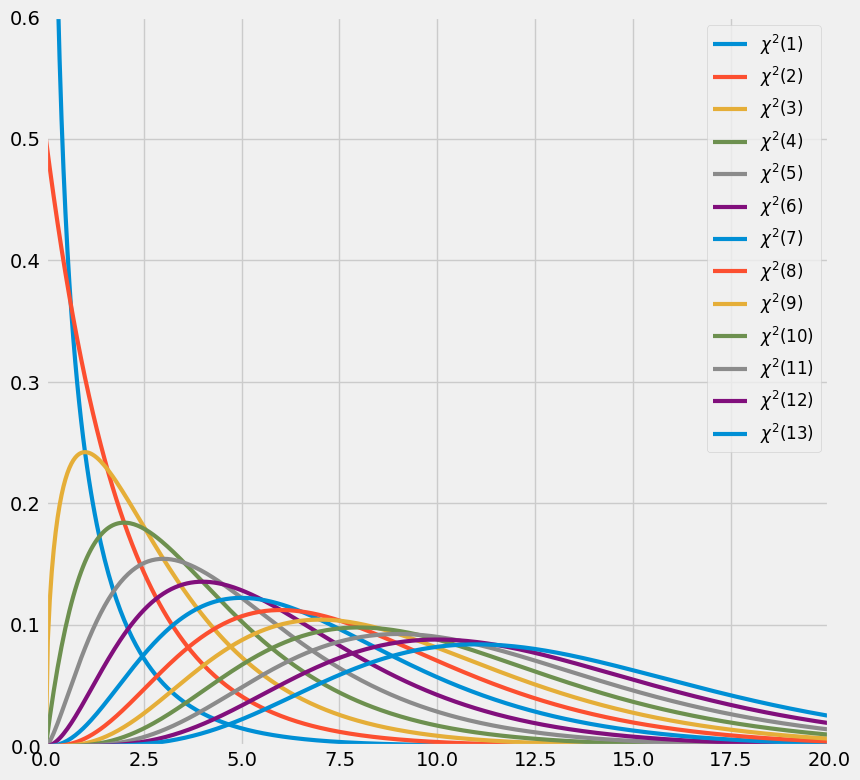

In [22]:
fig, ax = plt.subplots(figsize=(9, 9))
x = np.linspace(0, 50, 1000)
for i in range(1, 14):
    chi_pdf = sp.stats.chi2.pdf(x, i)
    ax.plot(x, chi_pdf, lw=3, label="$\chi^2 (%.0d)$" % i)
    ax.legend(fontsize=12)
ax.axis([0, 20, 0, 0.6])
plt.show()

### <font face="gotham" color="purple"> Quadratic Form of $\chi^2$ Distribution </font>

If an $n$-random vector $\boldsymbol{y} \sim N(\boldsymbol{\mu}, \Sigma)$ then 

$$
(\boldsymbol{y} - \boldsymbol{\mu})^T\Sigma^{-1}(\boldsymbol{y}-\boldsymbol{\mu})\sim \chi^2(n)
$$

If $\boldsymbol{y} \sim N(\boldsymbol{0}, \Sigma)$ simplifies the expression

$$
\boldsymbol{y}^T\Sigma^{-1}\boldsymbol{y}\sim \chi^2(n)
$$

We will show why that holds by using diagonal decomposition. Since the $\Sigma$ is symmetric, it is orthogonally diagonalizable, 


$$
\Sigma = QDQ^T 
$$

where 

$$
D=\left[\begin{array}{ccccc}
\lambda_{1} & 0 & 0 & \ldots & 0 \\
0 & \lambda_{2} & 0 & \ldots & 0 \\
\vdots & \vdots & \vdots & & \vdots \\
0 & 0 & 0 & \ldots & \lambda_{n}
\end{array}\right]
$$

$\lambda$s are eigenvalues. And $Q^{-1} = Q^T$, $Q$ holds all the eigenvectors of $\Sigma$ which are mutually perpendicular.

Denote $D^*$ as 

$$
D^* =
\left[\begin{array}{ccccc}
\frac{1}{\sqrt{\lambda_{1}}} & 0 & 0 & \ldots & 0 \\
0 & \frac{1}{\sqrt{\lambda_{2}}} & 0 & \ldots & 0 \\
\vdots & \vdots & \vdots & & \vdots \\
0 & 0 & 0 & \ldots & \frac{1}{\sqrt{\lambda_{n}}}
\end{array}\right]
$$

Let the matrix $H = QD^*Q^T$, since $H$ is also symmetric

$$
HH^T= QD^*Q^TQD^*Q^T= Q^TD^*D^*Q = QD^{-1}Q^T =\Sigma^{-1}
$$

Furthermore

$$
H\Sigma H^T = QD^*Q^T\Sigma QD^*Q^T = QD^*Q^TQDQ^T  QD^*Q^T = QD^*DD^*Q^T = QQ^T = I
$$

Back to the results from above, we set $\boldsymbol{z} = H^T (\boldsymbol{y}-\boldsymbol{\mu})$, which is standard normal distribution since

$$
E(\boldsymbol{z})= H^TE(\boldsymbol{y}-\boldsymbol{\mu})=\boldsymbol{0}\\
\text{Var}(\boldsymbol{z}) = H\text{Var}(\boldsymbol{y}-\boldsymbol{\mu})H^T =H\Sigma H^T = I 
$$

Back to where we started

$$
(\boldsymbol{y}-\boldsymbol{\mu})^T\Sigma^{-1}(\boldsymbol{y}-\boldsymbol{\mu}) = (\boldsymbol{y}-\boldsymbol{\mu})^THH^T (\boldsymbol{y}-\boldsymbol{\mu}) = (H^T (\boldsymbol{y}-\boldsymbol{\mu}))^T(H^T (\boldsymbol{y}-\boldsymbol{\mu})) = \boldsymbol{z}^T\boldsymbol{z}
$$

here we proved that $(\boldsymbol{y}-\boldsymbol{\mu})^T\Sigma^{-1}(\boldsymbol{y}-\boldsymbol{\mu}) \sim \chi^2(n)$.

More details of proof in <a href='https://math.stackexchange.com/questions/2808041/x-normally-distributed-then-xt-sigma-1-x-follows-chi-square-distribut?noredirect=1&lq=1'>this page</a>.


## <font face="gotham" color="purple"> The Student’s $t$ Distribution </font>

If $z\sim N(0, 1)$ and $y\sim \chi^2(m)$, and $z$ and $y$ are independent, then 

$$
t = \frac{z}{\sqrt{y/m}}
$$

follows the **Student's t distribution** with $m$ d.o.f. 

Here is the plot of $t$-distribution, note that $t(1)$ is called **Cauchy distribution** which has no moments at all, because integral does not converge due to fat tails.

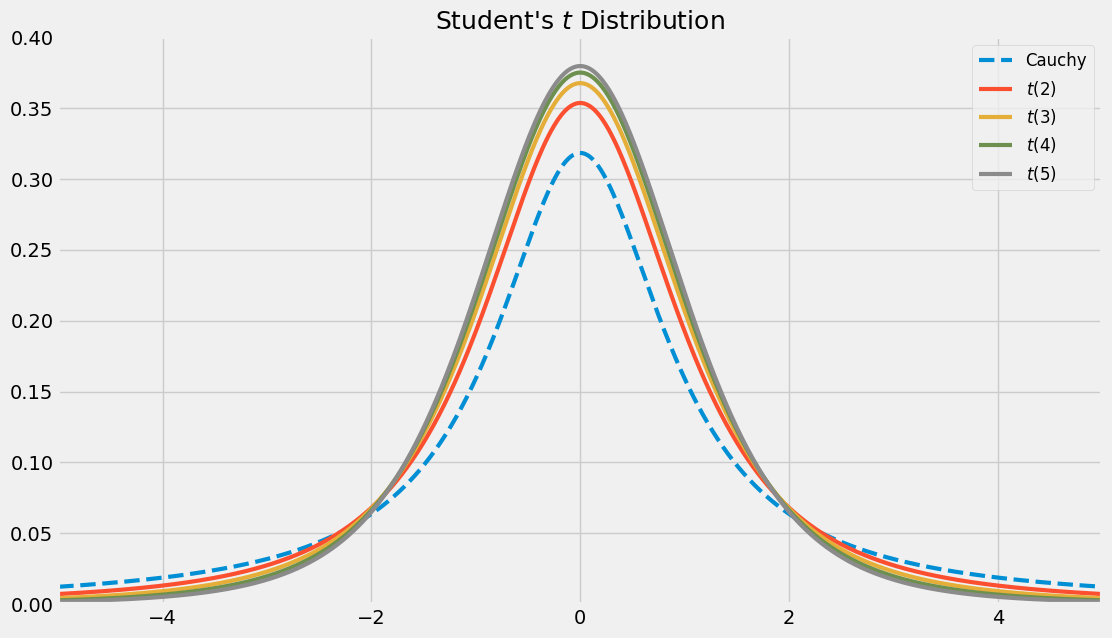

In [23]:
fig, ax = plt.subplots(figsize=(12, 7))
x = np.linspace(-5, 5, 1000)
for i in range(1, 6):
    chi_pdf = sp.stats.t.pdf(x, i)
    if i == 1:
        ax.plot(x, chi_pdf, lw=3, label="Cauchy", ls="--")
        continue
    else:
        ax.plot(x, chi_pdf, lw=3, label="$t (%.0d)$" % i)
        ax.legend(fontsize=12)
ax.axis([-5, 5, 0, 0.4])
ax.set_title("Student's $t$ Distribution", size=18)
plt.show()

As $m \rightarrow \infty$, $t(m)\rightarrow N(0, 1)$, in the limit process, the tails of $t$ distribution will diminish, and becoming thinner.

## <font face="gotham" color="purple"> The $F$ Distribution </font>

If $y_1$ and $y_2$ are independent random variables distributed as $\chi^2(m_1)$ and $\chi^2(m_2)$, then the random variable 

$$
F = \frac{y_1/m_1}{y_2/m_2}
$$

follows the **$F$ distribution**, denoted $ F(m_1, m_2)$.

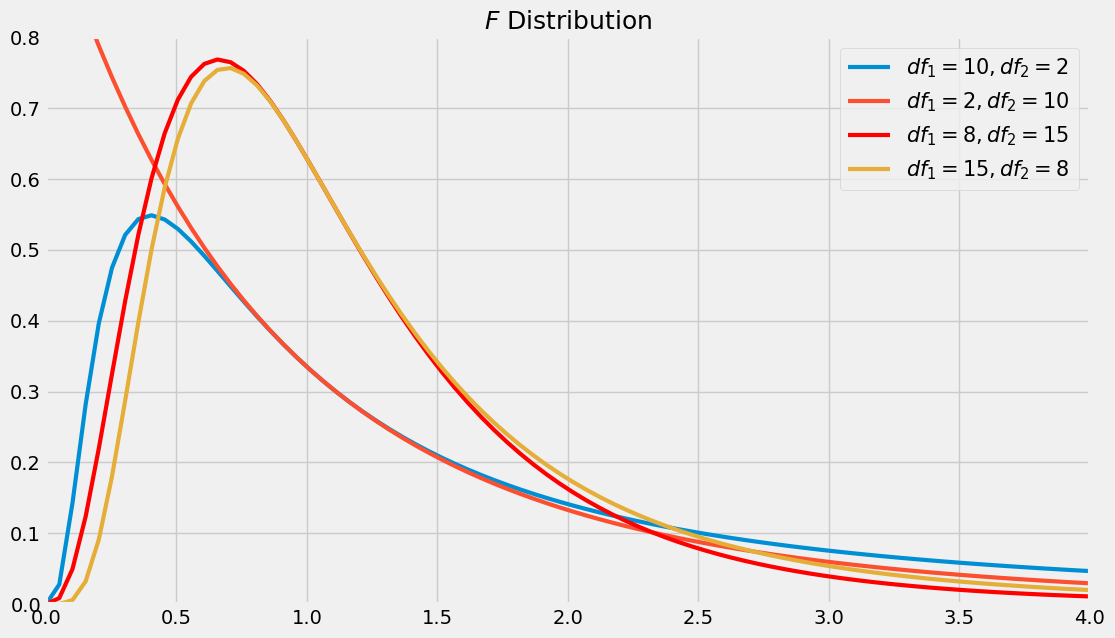

In [24]:
x = np.linspace(0.001, 5, 100)
fig, ax = plt.subplots(figsize=(12, 7))

df1 = 10
df2 = 2
f_pdf = sp.stats.f.pdf(x, dfn=df1, dfd=df2)
ax.plot(x, f_pdf, lw=3, label="$df_1 = %.d, df_2 = %.d$" % (df1, df2))

df1 = 2
df2 = 10
f_pdf = sp.stats.f.pdf(x, dfn=df1, dfd=df2)
ax.plot(x, f_pdf, lw=3, label="$df_1 = %.d, df_2 = %.d$ " % (df1, df2))

df1 = 8
df2 = 15
f_pdf = sp.stats.f.pdf(x, dfn=df1, dfd=df2)
ax.plot(x, f_pdf, lw=3, color="red", label="$df_1 = %.d, df_2 = %.d$" % (df1, df2))

df1 = 15
df2 = 8
f_pdf = sp.stats.f.pdf(x, dfn=df1, dfd=df2)
ax.plot(x, f_pdf, lw=3, label="$df_1 = %.d, df_2 = %.d$ " % (df1, df2))

ax.legend(fontsize=15)
ax.axis([0, 4, 0, 0.8])
ax.set_title("$F$ Distribution", size=18)
plt.show()

# <font face="gotham" color="purple">Single Restriction </font>

Any linear restriction, such as $\beta_1 = 5$, $\beta_1 =2{\beta_2}$ can be tested, however, no loss of generality if linear restriction of $\beta_2=0$ is demonstrated. 

We first take a look at single restriction, see how FWL regression can help to construct statistic tests. 

The regression model is 

$$
\boldsymbol{y} = \boldsymbol{X}_1\boldsymbol{\beta}_1+\beta_2\boldsymbol{x}_2+\boldsymbol{u}
$$

where $\boldsymbol{x}_2$ is an $n$-vector, whereas $\boldsymbol{X}_1$ is an $n\times (m-1)$ matrix. 

Project $\boldsymbol{X}_1$ off $\boldsymbol{x}_2$, the FWL regression is

$$
\boldsymbol{M}_1\boldsymbol{y} = \beta_2\boldsymbol{M}_1\boldsymbol{x}_2 + \boldsymbol{M}_1\boldsymbol{u}
$$

Applying OLS estimate and variance formula,

$$
\hat{\beta}_2 = [(\boldsymbol{M}_1\boldsymbol{x}_2)^T\boldsymbol{M}_1\boldsymbol{x}_2]^{-1}(\boldsymbol{M}_1\boldsymbol{x}_2)^T\boldsymbol{M}_1\boldsymbol{y}=(\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2)^{-1}\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{y}=\frac{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{y}}{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2}\\
\text{Var}(\hat{\beta}_2) = \sigma^2 [(\boldsymbol{M}_1\boldsymbol{x}_2)^T(\boldsymbol{M}_1\boldsymbol{x}_2)]^{-1} =  \sigma^2(\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2)^{-1}
$$

If null hypothesis is $\beta_2^0=0$, also assuming that $\sigma^2$ is known. Construct a $z$-statistic

$$
z_{\beta_2} = \frac{\hat{\beta}_2}
{\sqrt{\text{Var}(\hat{\beta}_2)}}=\frac{\frac{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{y}}{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2}}{ \sigma(\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2)^{-\frac{1}{2}}}
= \frac{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{y}}{\sigma(\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2)^{\frac{1}{2}}}
$$

However, $\sigma$ is not likely to be known, hence we replace it with $s$, the least square standard error estimator. Recall that 

$$
s^2 =\frac{1}{n-k} \sum_{t=1}^n u_t^2 = \frac{\boldsymbol{u}^T\boldsymbol{u}}{n-k}= \frac{(\boldsymbol{M_X y})^T\boldsymbol{M_X y}}{n-k}=\frac{\boldsymbol{y}^T\boldsymbol{M_X y}}{n-k}
$$

Replace the $\sigma$ in $z_{\beta_2}$, we obtain $t$-statistic

$$
t_{\beta_2} =  \frac{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{y}}{s(\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2)^{\frac{1}{2}}} = \left(\frac{\boldsymbol{y}^T\boldsymbol{M_X y}}{n-k}\right)^{-\frac{1}{2}}\frac{\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{y}}{(\boldsymbol{x}_2^T\boldsymbol{M}_1\boldsymbol{x}_2)^{\frac{1}{2}}}
$$

Of course we can also show it indeed follows the $t$ distribution by using the definition that the ratio of standard normal variable to a $\chi^2$ variable. However, this is unnecessary for us.

# <font face="gotham" color="purple"> Multiple Restrictions </font>

Multiple restrictions test can be formulated as following

$$
H_0:\quad \boldsymbol{y} = \boldsymbol{X}_1\boldsymbol{\beta_1} + \boldsymbol{u}\\
H_1:\quad \boldsymbol{y} = \boldsymbol{X}_1\boldsymbol{\beta_1} +\boldsymbol{X}_2\boldsymbol{\beta_2}+ \boldsymbol{u}
$$

$H_0$ is restricted model, $H_1$ is unrestricted. And we denote restricted residual sum of squares as $\text{RRSS}$, and unrestricted residual sum of squares as $\text{URSS}$, the test statistic is 

$$
F_{\beta_2}= \frac{(\text{RRSS}-\text{URSS})/r}{\text{URSS}/(n-k)}
$$

where $r=k_2$, the number of restrictions on $\beta_2$.

Using FWL regression with $\boldsymbol{M}_1$ and $\text{TSS = ESS + RSS}$, 

$$
\boldsymbol{M}_1\boldsymbol{y}=\boldsymbol{M}_1\boldsymbol{X}_2\boldsymbol{\beta}_2+\boldsymbol{u} \tag{FWL regression}
$$

\begin{align}
\text{URSS}& =(\boldsymbol{M_1y})^T\boldsymbol{M_1y}- \underbrace{\left[\boldsymbol{M}_1\boldsymbol{X}_2[(\boldsymbol{M}_1\boldsymbol{X}_2)^T\boldsymbol{M}_1\boldsymbol{X}_2]^{-1}(\boldsymbol{M}_1\boldsymbol{X}_2)^T\boldsymbol{y}\right]^T}_{\text{projection matrix}\ P}\boldsymbol{y}\\
 &= \boldsymbol{y}^T\boldsymbol{M}_1\boldsymbol{y} -\boldsymbol{y}^T\boldsymbol{M}_1\boldsymbol{X}_2(\boldsymbol{X}_2^T\boldsymbol{M}_1\boldsymbol{X}_2)^{-1}\boldsymbol{X}^T_2\boldsymbol{M}_1 \boldsymbol{y} = \boldsymbol{y}^T\boldsymbol{M_X}\boldsymbol{y}
\end{align}

$$
\text{RRSS} = (\boldsymbol{M}_1y)^T\boldsymbol{M}_1y = \boldsymbol{y}^T\boldsymbol{M}_1\boldsymbol{y}
$$

Therefore
$$
\text{RRSS}-\text{URSS}=\boldsymbol{y}^T\boldsymbol{M}_1\boldsymbol{X}_2(\boldsymbol{X}_2^T\boldsymbol{M}_1\boldsymbol{X}_2)^{-1}\boldsymbol{X}^T_2\boldsymbol{M}_1 \boldsymbol{y}
$$

We have all parts of $F$ statistic, combine them

$$
F_{\boldsymbol{\beta}_{2}}=\frac{\boldsymbol{y}^{T} \boldsymbol{M}_{1} \boldsymbol{X}_{2}\left(\boldsymbol{X}_{2}^{T} \boldsymbol{M}_{1} \boldsymbol{X}_{2}\right)^{-1} \boldsymbol{X}_{2}^{T} \boldsymbol{M}_{1} \boldsymbol{y} / r}{\boldsymbol{y}^{T} \boldsymbol{M}_{\boldsymbol{X}} \boldsymbol{y} /(n-k)}
$$

In contrast, $t$ statistic will be
$$
t_{\beta_{2}}=\sqrt{\frac{\boldsymbol{y}^{\top} \boldsymbol{M}_{1} \boldsymbol{x}_{2}\left(\boldsymbol{x}_{2}^{\top} \boldsymbol{M}_{1} \boldsymbol{x}_{2}\right)^{-1} \boldsymbol{x}_{2}^{\top} \boldsymbol{M}_{1} \boldsymbol{y}}{\boldsymbol{y}^{\top} \boldsymbol{M}_{\boldsymbol{X}} \boldsymbol{y} /(n-k)}}
$$

To test the equality of two parameter vectors, we modify the $F$ test as
$$
F_{\gamma}=\frac{\left(\mathrm{RRSS}-\mathrm{RSS}_{1}-\mathrm{RSS}_{2}\right) / k}{\left(\mathrm{RSS}_{1}+\mathrm{RSS}_{2}\right) /(n-2 k)}
$$
for example, the sample being divided into two subsamples, to compare the stability of two subsamples, this so-called **Chow test** is a common practice.

# <font face="gotham" color="purple"> Asymptotic Theory  </font>

**Asymptotic Theory** is concerned with the distribution of estimators and test statistics as the sample size $n$ tends to infinity.

## <font face="gotham" color="purple"> Law of Large Numbers  </font>

The widely-known **Law of Large Numbers** ($\text{LLN}$) takes the form
$$
\bar{x} = \frac{1}{n}\sum_{t=1}^nx_t
$$
where $x_t$ are independent variables with its own bounded variance $\sigma_t^2$ and a common mean $\mu$. $\text{LLN}$ tells that as $n\rightarrow \infty$, then $\bar{x} \rightarrow \mu$.

The **Fundamental Theorem of Statistics** can be proved with $\text{LLN}$.

An **empirical distribution function** ($\text{EDF}$) can be expressed as
$$
\hat{F}(x) \equiv \frac{1}{n} \sum_{t=1}^{n} I\left(x_{t} \leq x\right)
$$
where $I(\cdot)$ is an **indicator function**, which takes value $1$ when its argument is true, otherwise $0$. To prove the Fundamental Theorem of Statistics, we invoke the $\text{LLN}$, expand the expectation

\begin{aligned}
\mathrm{E}\left(I\left(x_{t} \leq x\right)\right) &=0 \cdot \operatorname{Pr}\left(I\left(x_{t} \leq x\right)=0\right)+1 \cdot \operatorname{Pr}\left(I\left(x_{t} \leq x\right)=1\right) \\
&=\operatorname{Pr}\left(I\left(x_{t} \leq x\right)=1\right)=\operatorname{Pr}\left(x_{t} \leq x\right)=F(x)
\end{aligned}

It turns out that $\hat{F}(x)$ is a consistent estimator of $F(x)$.

## <font face="gotham" color="purple"> Central Limit Theorems  </font>

The **Central Limit Theorems** ($\text{CLT}$) tells that $\frac{1}{n}$ times the sum of $n$ centered random variables will approximately follow a normal distribution when $n$ is sufficiently large. The most well $\text{CLT}$ is **Lindeberg-Lévy** $\text{CLT}$, the quantity
$$
z \equiv \frac{1}{\sqrt{n}} \sum_{t=1}^{n} \frac{x_{t}-\mu}{\sigma}
$$
is **asymptotically distributed** as $N(0,1)$.

We won't bother to prove them, but they are the implicit theoretical foundation when we are discussing **simulation-based tests**.

# <font face="gotham" color="purple"> Bootstrapping  </font>

The bootstrapping is a computational technique for handling small size sample or any sample that doesn't follow any known distribution. 

It's rare to see it in classical linear regression model, since the sampling distribution of coefficients follow normal distribution if disturbance terms follow normal distribution.

However, for demonstration purpose, we will show how a bootstrap test is perform. The model is a simple linear regression
$$
Y_t = 5 + 6 X_t + 10u_t
$$
where $u_t\sim N(0, 1)$.

Generate $Y$ and $X$ then pass them to a data frame.

In [25]:
ols_obj = lr.OLS_Simu(100, 2, [5, 6])

In [26]:
bootstr_params_const, bootstr_params_1 = [], []
nr_bootstrp = 100

In [27]:
df = pd.DataFrame(ols_obj.X)
df["y"] = ols_obj.y
df.columns = ["const", "x1", "y"]

In [28]:
resample_size = 100

Repetitively sample from the generated dataframe and estimate parameters.

C:\Users\user\AppData\Local\Temp\ipykernel_20324\2051322491.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bootstr_params_const.append(bootstrap_params[0])
C:\Users\user\AppData\Local\Temp\ipykernel_20324\2051322491.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bootstr_params_1.append(bootstrap_params[1])
C:\Users\user\AppData\Local\Temp\ipykernel_20324\2051322491.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bootst

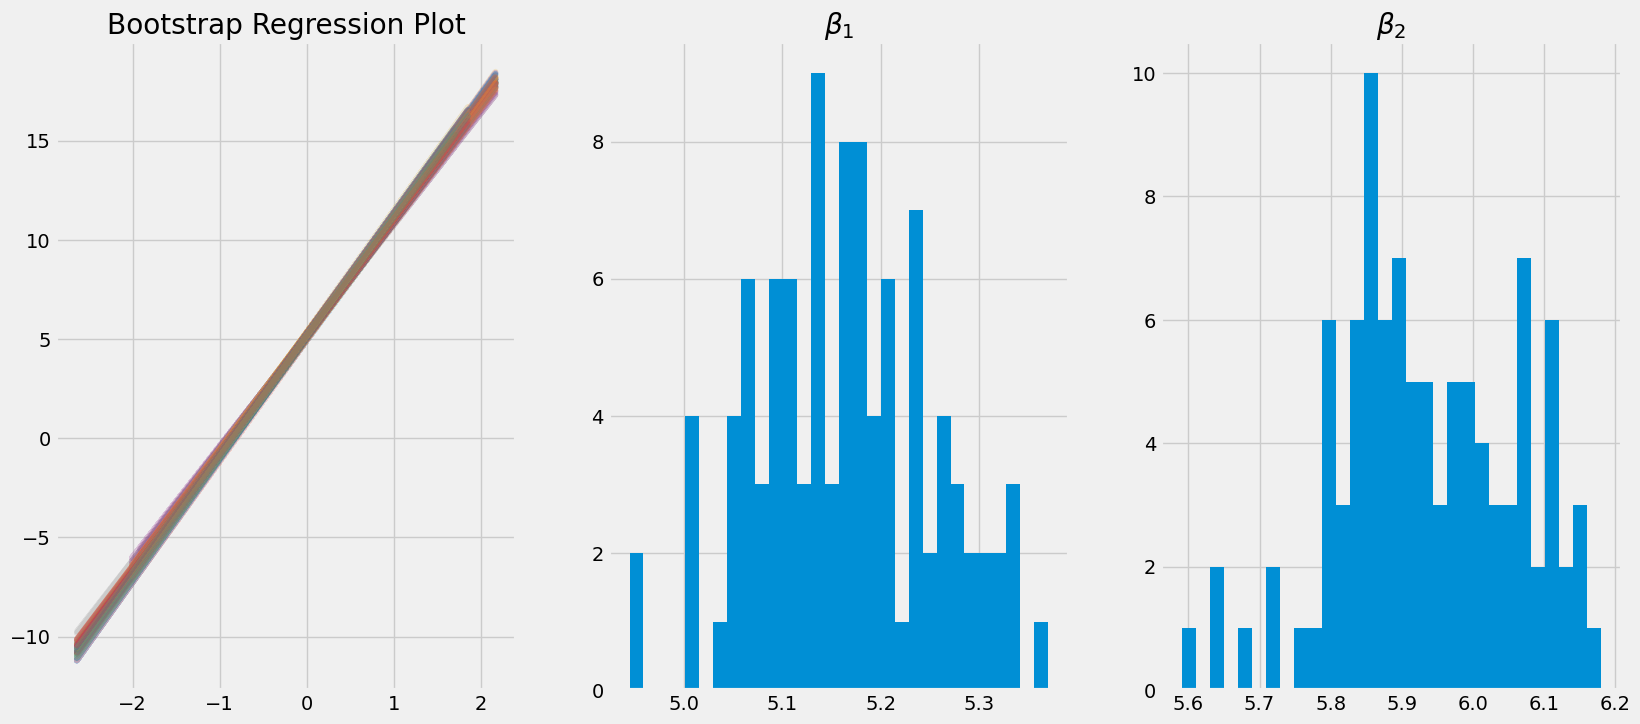

In [29]:
fig, ax = plt.subplots(figsize=(18, 8), nrows=1, ncols=3)
for i in range(nr_bootstrp):
    df_resample = df.sample(resample_size, replace=True)
    ols_fit = smf.ols(formula="y ~ x1", data=df_resample).fit()
    bootstrap_params = ols_fit.params
    bootstr_params_const.append(bootstrap_params[0])
    bootstr_params_1.append(bootstrap_params[1])
    y_pred_temp = ols_fit.predict(df_resample["x1"])
    ax[0].plot(df_resample["x1"], y_pred_temp, alpha=0.2)
ax[0].set_title("Bootstrap Regression Plot")
ax[1].hist(bootstr_params_const, bins=30)
ax[1].set_title(r"$\beta_1$")
ax[2].hist(bootstr_params_1, bins=30)
ax[2].set_title(r"$\beta_2$")
plt.show()

# <font face="gotham" color="purple"> Confidence Interval  </font>

A **confidence interval** for some parameter $\theta$ consists all values of $\theta_0$ that can't be rejected by corresponding hypothesis. If the finite-sample distribution is known, we have an **exact confidence interval** $[\theta_l, \theta_u]$, of which $\theta_l$ and $\theta_u$ represents lower and upper limit. 

For instance, we have a test statistic
$$
\tau\left(\boldsymbol{y}, \theta_{0}\right) \equiv\frac{\hat{\theta}-\theta_{0}}{s_{\theta}}
$$

Here $\boldsymbol{y}$ denotes the sample used to compute the particular realization of the statistic, $\hat{\theta}$ is the estimate of $\theta$ and $s_\theta$ is the corresponding standard error. The confidence interval can be found by solving the equation
$$
\tau(\boldsymbol{y}, \theta)=c_{\alpha}
$$

where $c_\alpha$ is the critical value with significance level $\alpha$. Solve
$$
\frac{\hat{\theta}-\theta}{s_{\theta}}=c_{\alpha}
$$

Two solutions are 
$$
\theta_{l}=\hat{\theta}-s_{\theta} c_{\alpha} \quad \text { and } \quad \theta_{u}=\hat{\theta}+s_{\theta} c_{\alpha}
$$
The confidence interval is 
$$
[\hat{\theta}-s_{\theta} c_{\alpha},\quad \hat{\theta}+s_{\theta} c_{\alpha}]
$$

To obtain critical values, it is convenient to use cumulative distribution function, e.g. the common critical value of $t$-statistic is $\pm 1.96$ assuming a large degree of freedom. 

In [30]:
sp.stats.t.ppf([0.025, 0.975], df=1000)

array([-1.96233908,  1.96233908])

If you wish to have the same mass on each side of the distribution, the quantiles are $\frac{\alpha}{2}$ and $1-\frac{\alpha}{2}$.

For a linear regression model
$$
\operatorname{Pr}\left(t_{\alpha / 2} \leq \frac{\hat{\beta}-\beta}{s} \leq t_{1-(\alpha / 2)}\right)=1-\alpha
$$
Solve it, we get
$$
\operatorname{Pr}\left(\hat{\beta}_{2}-s_{2} t_{\alpha / 2} \geq \beta_{20} \geq \hat{\beta}_{2}-s_{2} t_{1-(\alpha / 2)}\right)
$$

Or more intuitively written as
$$
[\hat{\beta}_{2}-s_{2} t_{1-(\alpha / 2)}, \quad \hat{\beta}_{2}+s_{2} t_{1-(\alpha / 2)}]
$$

In [31]:
df = pd.read_excel("Basic_Econometrics_practice_data.xlsx", sheet_name="US_CobbDauglas")
df.columns = ("Area", "Output", "Labour", "Capital")
ols_obj_fit = smf.ols(
    formula="np.log(Output) ~ np.log(Labour) + np.log(Capital)", data=df
).fit()

In [32]:
print(ols_obj_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(Output)   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     645.9
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           2.00e-35
Time:                        13:55:47   Log-Likelihood:                -3.4267
No. Observations:                  51   AIC:                             12.85
Df Residuals:                      48   BIC:                             18.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.8876      0.396     

In [33]:
ols_obj_fit.conf_int()[0]

Intercept          3.090929
np.log(Labour)     0.269428
np.log(Capital)    0.326475
Name: 0, dtype: float64

In [34]:
ols_obj_fit.conf_int()

,0,1
Intercept,3.090929,4.684270
np.log(Labour),0.269428,0.667236
np.log(Capital),0.326475,0.716084


# <font face="gotham" color="purple"> Full Session of Bootstrapping  </font>

In [35]:
df = pd.read_excel("Basic_Econometrics_practice_data.xlsx", sheet_name="US_CobbDauglas")
df.columns = ("Area", "Output", "Labour", "Capital")
ols_obj_fit = smf.ols(
    formula="np.log(Output) ~ np.log(Labour) + np.log(Capital)", data=df
).fit()

In [36]:
print(ols_obj_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(Output)   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     645.9
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           2.00e-35
Time:                        13:55:47   Log-Likelihood:                -3.4267
No. Observations:                  51   AIC:                             12.85
Df Residuals:                      48   BIC:                             18.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.8876      0.396     

In [37]:
len(ols_obj_fit.params)

3

In [38]:
ols_obj_fit.params["Intercept"]

3.887599524041647

In [39]:
ols_obj_fit.conf_int()[0]

Intercept          3.090929
np.log(Labour)     0.269428
np.log(Capital)    0.326475
Name: 0, dtype: float64

In [40]:
ols_obj_fit.conf_int()

,0,1
Intercept,3.090929,4.684270
np.log(Labour),0.269428,0.667236
np.log(Capital),0.326475,0.716084


In [41]:
formula = "np.log(Output) ~ np.log(Labour) + np.log(Capital)"
# number of bootstrap rounds
B = 2000

# placeholder matrix B rows and k columns
results_bootrp = np.zeros((B, len(ols_obj_fit.params)))

# row id range
row_id = range(0, df.shape[0])

for i in range(B):
    # this samples with replacement from rows
    this_sample = np.random.choice(
        row_id, size=df.shape[0], replace=True
    )  # gives sampled row numbers
    # Define data for this replicate:
    df_bootstrp = df.iloc[this_sample]
    # Estimate model
    params_bootstrp = smf.ols(formula, data=df_bootstrp).fit().params
    # Store in row r of results_boot:
    results_bootrp[i, :] = params_bootstrp

In [42]:
results_bootrp = pd.DataFrame(
    results_bootrp, columns=["Intercept", "Labour", "Capital"]
)

In [43]:
results_bootrp

,Intercept,Labour,Capital
0,3.925785,0.197814,0.757120
1,3.948418,0.473717,0.514946
2,3.641189,0.310931,0.674277
3,3.774821,0.269242,0.703503
4,3.470844,0.209122,0.775955
...,...,...,...
1995,4.235139,0.355169,0.597277
1996,3.934088,0.499134,0.489782
1997,3.761133,0.422994,0.569137
1998,3.749592,0.394117,0.594208


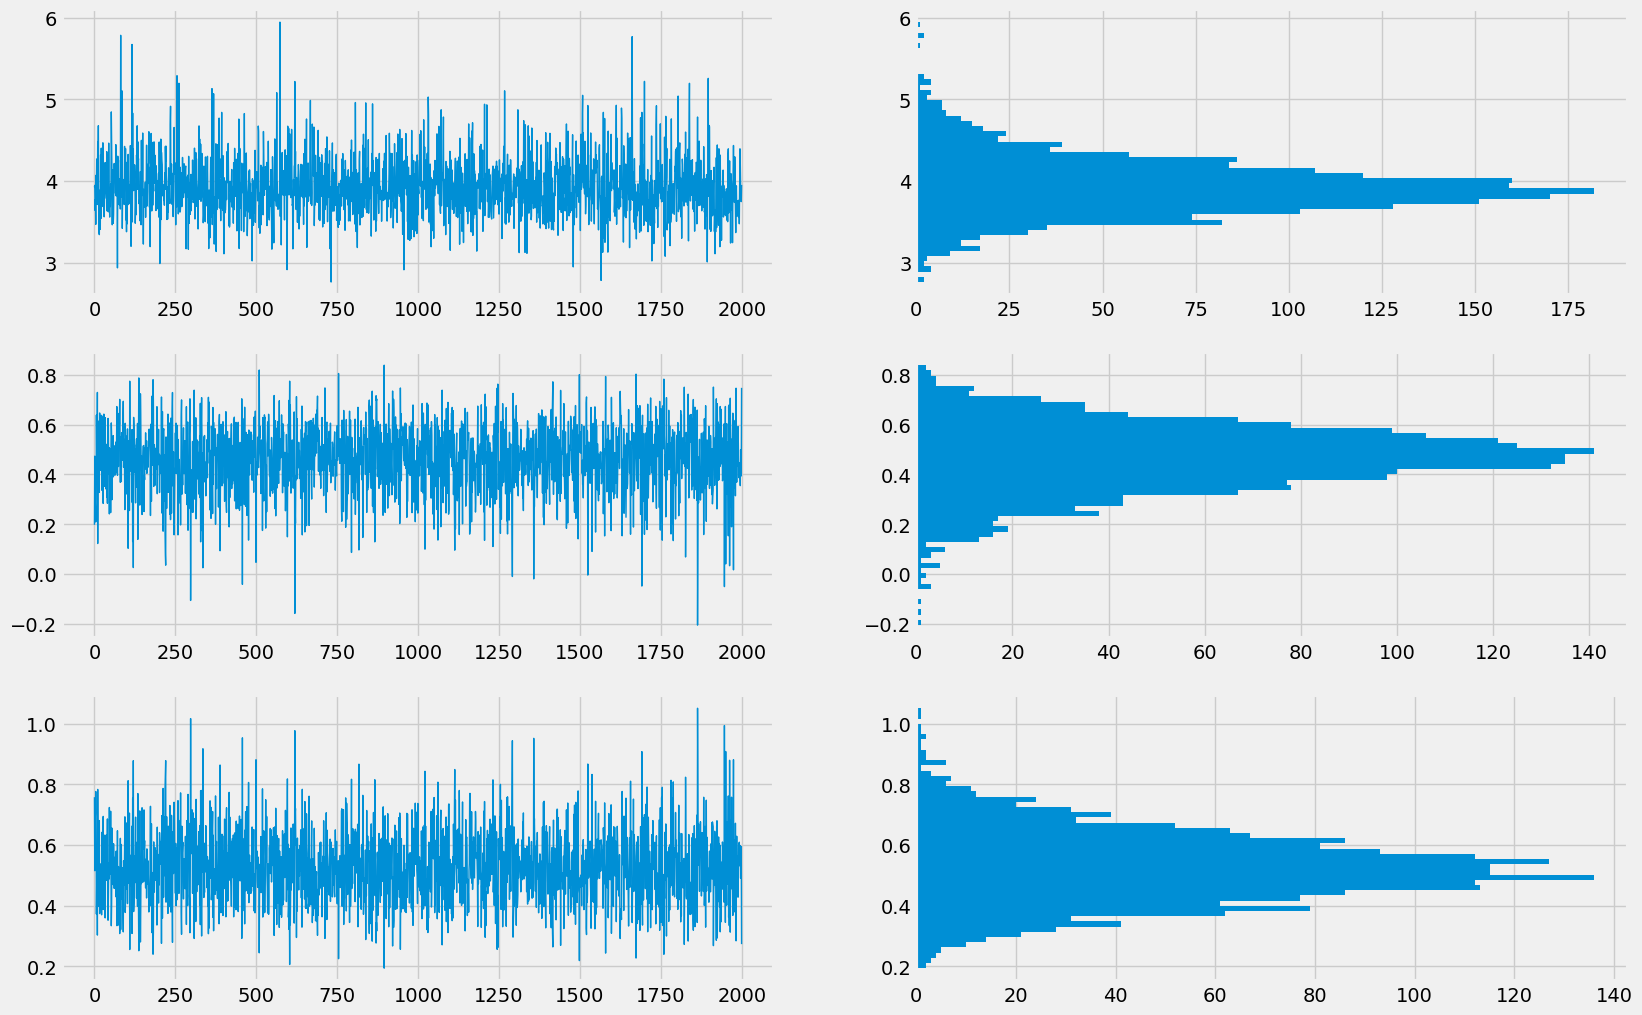

In [44]:
x_range = np.arange(B)
fig, ax = plt.subplots(figsize=(18, 12), nrows=3, ncols=2)
ax[0, 0].plot(x_range, results_bootrp["Intercept"], lw=1)
ax[0, 1].hist(results_bootrp["Intercept"], bins=50, orientation="horizontal")

ax[1, 0].plot(x_range, results_bootrp["Labour"], lw=1)
ax[1, 1].hist(results_bootrp["Labour"], bins=50, orientation="horizontal")

ax[2, 0].plot(x_range, results_bootrp["Capital"], lw=1)
ax[2, 1].hist(results_bootrp["Capital"], bins=50, orientation="horizontal")
plt.show()

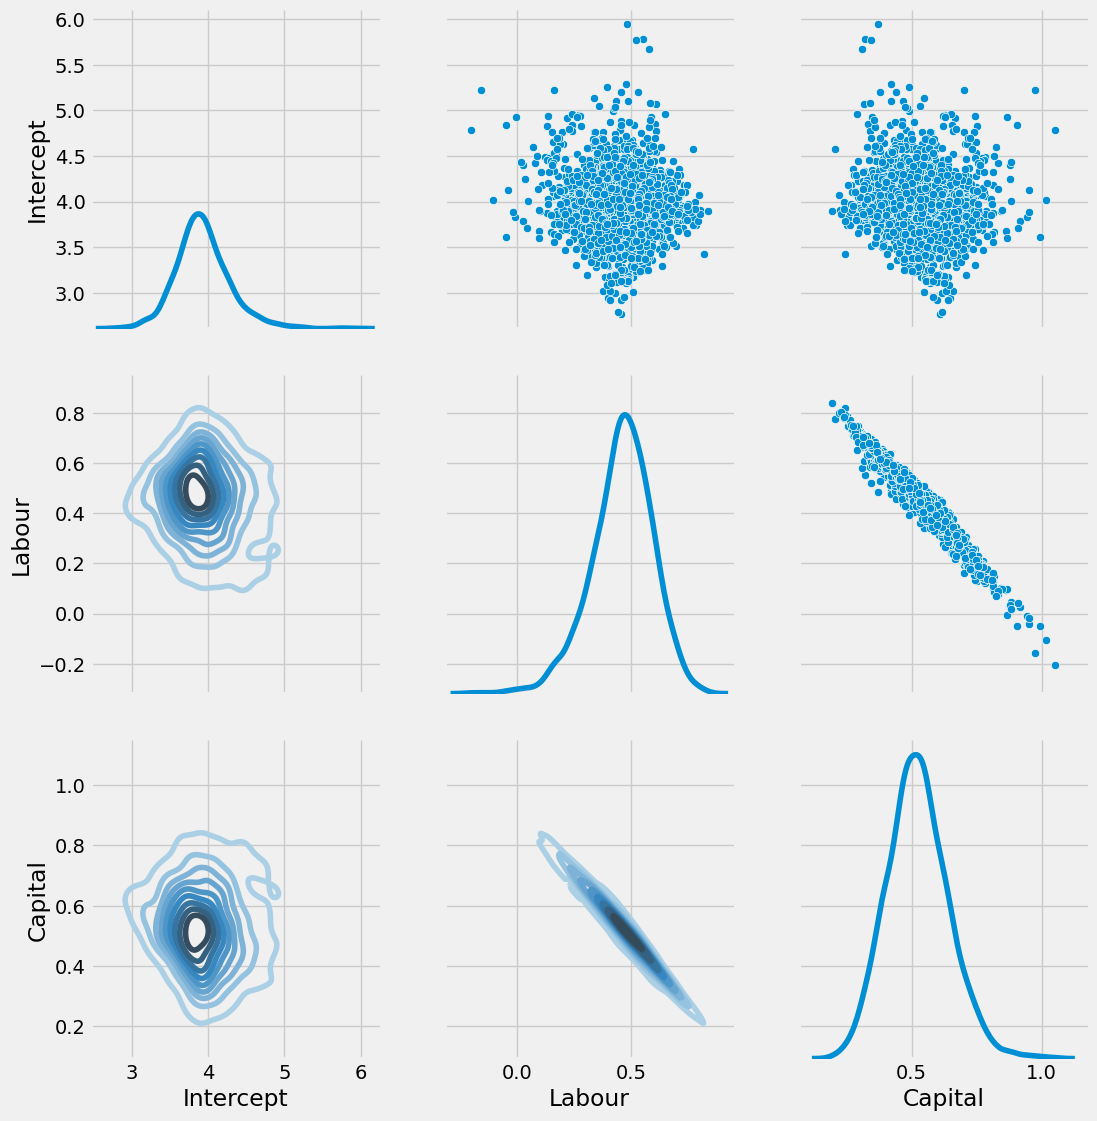

In [45]:
g = sns.PairGrid(results_bootrp)
g.fig.set_size_inches(12, 12)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.scatterplot)
plt.show()